In [28]:
#Since the aim here should be to predict the price of the stock on a given date, it is 
#more natural to use linear regression than classification. A classification model would be 
#appropriate if we were looking for binary answers, i.e. 'is the price going up or down?'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#import the TESLA stock dataset
df = pd.read_csv('TSLA2.csv', sep=',')

<AxesSubplot:>

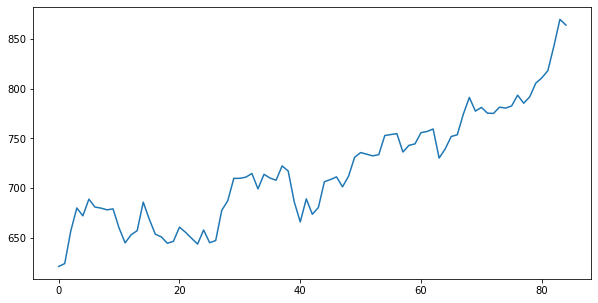

In [3]:
#Visualize the close price
df['Close'].plot(figsize=(10,5))
#Here we see a fairly steady increase, which means it could make some sense to use linear regression to predict
#the future stock price

In [4]:
#If we are going to use Date as a feature, we need to convert it from the datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)
#This changes the date into a nominal value representing x number of days since 01.01.0001

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
#If we take a look at the correlation between the features, we'll see that that the relationship between
#'High' and 'Close' stand out. But first we'll try to see what model we can create using 'Date' and 'Close'

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.907646,0.906328,0.907830,0.915495,0.915495,-0.285109
Open,0.907646,1.000000,0.989251,0.989883,0.977581,0.977581,-0.194920
High,0.906328,0.989251,1.000000,0.991536,0.992377,0.992377,-0.126524
Low,0.907830,0.989883,0.991536,1.000000,0.990427,0.990427,-0.215804
Close,0.915495,0.977581,0.992377,0.990427,1.000000,1.000000,-0.162736
Adj Close,0.915495,0.977581,0.992377,0.990427,1.000000,1.000000,-0.162736
Volume,-0.285109,-0.194920,-0.126524,-0.215804,-0.162736,-0.162736,1.000000


In [6]:
#This converts the set into an array
x = df.values
df = pd.DataFrame(x)
df.head()

,0,1,2,3,4,5,6
0,737962.0,624.479980,631.390015,608.880005,620.830017,620.830017,24812700.0
1,737963.0,618.250000,628.570007,615.500000,623.710022,623.710022,19158900.0
2,737964.0,632.000000,657.200012,630.039978,656.570007,656.570007,31099200.0
3,737965.0,674.989990,697.619995,667.609985,679.820007,679.820007,45982400.0
4,737966.0,689.580017,693.809998,668.700012,671.869995,671.869995,32496700.0


In [7]:
X = pd.DataFrame(df[0]) #Date
y = pd.DataFrame(df[4]) #Close

In [8]:
#This splits the data into a training set and a testing set. The most common division is 80/20 (training/testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [9]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_train)

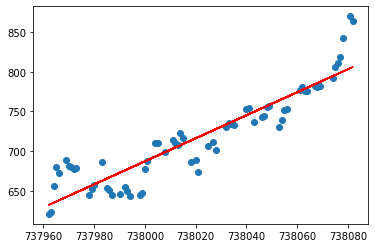

MSE = 544.8074697596254


In [10]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.show()
print("MSE = "+str(metrics.mean_squared_error(y_train,y_pred)))

In [11]:
#This doesn't give us a very accurate model, as we get a fairly high MSE (Mean Squared Error)
#There are also some very visible outliers.
#If we want to predict the stock on a given day with this model, we could do it like this (Day 738180, 100 days in the future): 

linreg.predict(np.array(738180).reshape(1,-1))


array([[948.3191332]])

In [20]:
#To see what a more accurate model would look like, we can use the data that seemed to correlate more

In [21]:
X = pd.DataFrame(df[3])
y = pd.DataFrame(df[4]) 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [23]:
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_train)

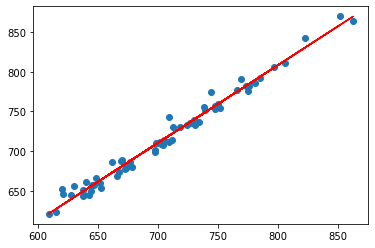

MSE = 60.79058349395041


In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color='red')
plt.show()
print("MSE = "+str(metrics.mean_squared_error(y_train,y_pred)))

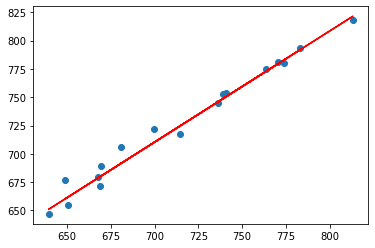

MSE = 57.38539076032034


In [25]:
y_pred = linreg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()
print("MSE = "+str(metrics.mean_squared_error(y_test, y_pred)))

In [27]:
#This model gives us a much lower MSE, but as it is now, it can't help us predict the stock on a given date, only
#what the close price would be based on a given daily high point.
#High point of 322:
linreg.predict(np.array(322).reshape(1,-1))


array([[339.79839097]])